## Machine Learning A/B Testing


In [37]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))
import pandas as pd

In [38]:
import pickle
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns# import libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn import preprocessing
from itertools import islice
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import scipy.stats as stat
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
from IPython.display import Image  

from sklearn.tree import export_graphviz
from sklearn import tree


import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

In [39]:
#Scripts
from helper import MyHelper
helper = MyHelper()
from desicion import DecisionTreesModel
from logisticRegression import LogisticRegression

In [9]:
df = pd.read_csv("../data/AdSmartABdata.csv")
df


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


In [10]:
exp_data=(df.groupby('date')
      .agg(pageviews=('yes','count'),yes=('yes','sum'),no=('no','sum'),hours=('hour','sum'))
      .reset_index()
       )
exp_data

,date,pageviews,yes,no,hours
0,2020-07-03,2015,147,178,27163
1,2020-07-04,903,76,83,9278
2,2020-07-05,890,52,65,9455
3,2020-07-06,490,35,39,2821
4,2020-07-07,480,38,45,5079
5,2020-07-08,1198,85,92,18388
6,2020-07-09,1208,85,99,13729
7,2020-07-10,893,54,70,7902


## K-Fold Cross-validation¶

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

In this section, we will use it to determine the performance of these models on the BIO data:

Logistic Regression Decision Tree XGBoost

In [11]:
# drop columns where yes and no are both 0
drop_mask = df.query('yes==0 and no==0') 
df=df.drop(drop_mask.index)
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1


In [12]:
def get_data(tag, 
            path='data/AdSmartABdata.csv', 
            repo ='‪C:/Users/Hikma Brhan/AB-Testing'
):
    rev = tag
    data_url = dvc.api.get_url(path=path, repo=repo, rev=rev)
    df = pd.read_csv(data_url)
    return df

In [13]:
# Function for creating an awareness column
def label_awareness (row):
    if row['yes'] == 1 :
         return '1'
    if row['no'] == 1 :
        return '0'
def calculate_metrics(y_test, y_preds):
    
    accuracy = accuracy_score(y_test, y_preds)
    return accuracy

In [14]:
# apply awareness to each row
df['awareness'] = df.apply (lambda row: label_awareness(row), axis=1) 
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,awareness
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,0
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0,1
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1,0
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0,1
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1,0


In [15]:
CLEANED_CSV_PATH = "../data/AdSmartABdata.csv"
helper.save_csv(df, CLEANED_CSV_PATH)

>> File Successfully Saved.!!!


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,awareness
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,0
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0,1
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1,0
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0,1
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1,0
...,...,...,...,...,...,...,...,...,...,...
8059,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1,0,1
8063,ffb176df-ecd2-45d3-b05f-05b173a093a7,exposed,2020-07-04,1,Generic Smartphone,6,Chrome Mobile,1,0,1
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0,1,0
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1,0


### change categorical variables to numerical value

In [16]:
# change categorical variables to numerical value
lb = LabelEncoder()
df['experiment'] = lb.fit_transform(df['experiment'])
df['browser'] = lb.fit_transform(df['browser'])
df['device_make'] = lb.fit_transform(df['device_make'])
df['date'] = lb.fit_transform(df['date'])
df['awareness'] = lb.fit_transform(df['awareness'])

#### Split data by browser and platform_os.

In [17]:
browser_df = df[["experiment", "hour", "date", 'device_make', 'browser', 'awareness']]
platform_df = df[["experiment", "hour", "date", 'device_make', 'platform_os', 'awareness']]

In [18]:
helper.save_csv(browser_df, "../data/AdSmartABdata.csv")

>> File Successfully Saved.!!!


,experiment,hour,date,device_make,browser,awareness
2,1,2,2,4,2,0
16,1,16,1,13,1,1
20,1,8,3,13,1,0
23,0,4,5,43,4,1
27,0,15,0,13,1,0
...,...,...,...,...,...,...
8059,1,21,2,13,1,1
8063,1,1,1,13,1,1
8064,0,7,6,13,1,0
8069,0,16,7,13,1,0


In [19]:
helper.save_csv(platform_df, "../data/AdSmartABdata.csv")

>> File Successfully Saved.!!!


,experiment,hour,date,device_make,platform_os,awareness
2,1,2,2,4,6,0
16,1,16,1,13,6,1
20,1,8,3,13,6,0
23,0,4,5,43,6,1
27,0,15,0,13,6,0
...,...,...,...,...,...,...
8059,1,21,2,13,6,1
8063,1,1,1,13,6,1
8064,0,7,6,13,6,0
8069,0,16,7,13,6,0


In [20]:
platform_df.head()

,experiment,hour,date,device_make,platform_os,awareness
2,1,2,2,4,6,0
16,1,16,1,13,6,1
20,1,8,3,13,6,0
23,0,4,5,43,6,1
27,0,15,0,13,6,0


In [21]:
browser_df.head()

,experiment,hour,date,device_make,browser,awareness
2,1,2,2,4,2,0
16,1,16,1,13,1,1
20,1,8,3,13,1,0
23,0,4,5,43,4,1
27,0,15,0,13,1,0


# Model training using Decision Tree using browser dataframe

In [22]:
# feature_cols = ["experiment", "hour", "date", 'device_make', "platform_os",  "browser"]
feature_cols = ["experiment", "hour", "date", 'device_make', 'browser']

X = browser_df[feature_cols]
y = browser_df[['awareness']]

test_size = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Model Training Using DecisionTreesModel

In [23]:
decisionTreesModel = DecisionTreesModel(X_train, X_test,  y_train, y_test)
clf, acc_arr, loss_arr = decisionTreesModel.train(5)

step 0: Validation Accuracy of DecisionTreesModel is: 0.571
step 0: Validation Loss of DecisionTreesModel is: 0.655

step 1: Validation Accuracy of DecisionTreesModel is: 0.536
step 1: Validation Loss of DecisionTreesModel is: 0.681

step 2: Validation Accuracy of DecisionTreesModel is: 0.558
step 2: Validation Loss of DecisionTreesModel is: 0.665

step 3: Validation Accuracy of DecisionTreesModel is: 0.507
step 3: Validation Loss of DecisionTreesModel is: 0.702

step 4: Validation Accuracy of DecisionTreesModel is: 0.565
step 4: Validation Loss of DecisionTreesModel is: 0.660



step 1: Test Accuracy of DecisionTreesModel is: 0.544
Test Metrics
              precision    recall  f1-score   support

           0       0.95      0.53      0.69       116
           1       0.10      0.67      0.17         9

    accuracy                           0.54       125
   macro avg       0.53      0.60      0.43       125
weighted avg       0.89      0.54      0.65       125

Loss on test data is: 0.675



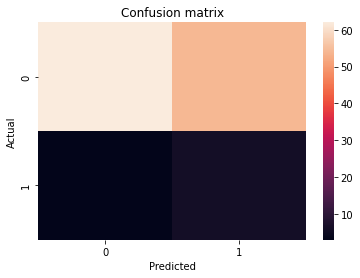

In [24]:
test_acc, loss, report, confusion_matrix = decisionTreesModel.test()
print(f"Loss on test data is: {loss:.3f}")
print()

In [25]:
decisionTreesModel.get_feature_importance()

,feature,feature_importances
0,experiment,0.000000
1,hour,0.401460
2,date,0.054408
3,device_make,0.336032
4,browser,0.208099


## Analysis of the result

##### 1 The highest contributing factor for the 'awarness' is 'hour Feature importance of hour is 0.41

##### 2 The second contributing factor for the 'awarness' is 'device_make Feature importance of device_make is 0.33

##### 3 The third contributing factor for the 'awarness' is 'browser Feature importance of browser is 0.199

The least contributing factor is 'experiment 'experiment' feature has 0 factor on Decision Tree Model, which means it is not contributing anything for the awareness.

## Model Training Using DecisionTreesModel

In [26]:
decisionTreesModel = DecisionTreesModel(X_train, X_test,  y_train, y_test)
clf, acc_arr, loss_arr = decisionTreesModel.train(5)

step 0: Validation Accuracy of DecisionTreesModel is: 0.571
step 0: Validation Loss of DecisionTreesModel is: 0.655

step 1: Validation Accuracy of DecisionTreesModel is: 0.531
step 1: Validation Loss of DecisionTreesModel is: 0.685

step 2: Validation Accuracy of DecisionTreesModel is: 0.558
step 2: Validation Loss of DecisionTreesModel is: 0.665

step 3: Validation Accuracy of DecisionTreesModel is: 0.507
step 3: Validation Loss of DecisionTreesModel is: 0.702

step 4: Validation Accuracy of DecisionTreesModel is: 0.565
step 4: Validation Loss of DecisionTreesModel is: 0.660



## Model training using LogisticRegression using browser dataframe

In [27]:
# feature_cols = ["experiment", "hour", "date", 'device_make', "platform_os",  "browser"]
feature_cols = ["experiment", "hour", "date", 'device_make', 'browser']

X = browser_df[feature_cols]
y = browser_df[['awareness']]

test_size = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

## Model Training Using LogisticRegression

In [40]:
logisticRegression = LogisticRegression(X_train, X_test,  y_train, y_test)
clf, acc_arr, loss_arr = logisticRegression.train(5)

TypeError: __init__() missing 3 required positional arguments: 'X_test', 'y_train', and 'y_test'

In [41]:
test_acc, loss, report, confusion_matrix = LogisticRegression.test()
print(f"Loss on test data is: {loss:.3f}")
print()

TypeError: test() missing 1 required positional argument: 'self'

In [42]:
logisticRegression.get_feature_importance()

NameError: name 'logisticRegression' is not defined